# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [3]:
# Your code here:

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


32The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [4]:
# Your code here:
#ndas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) → 'DataFrame'[source]

pokemonlegendary = pokemon.Legendary.value_counts()
pokemonlegendary

False    735
True      65
Name: Legendary, dtype: int64

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [5]:
# Your code here:
#Agrupo los legendarios  y le hago la media y la desviación standard
pokemonsPoints = pokemon.groupby("Legendary").agg({"Total":["mean","std"]})
pokemonsPoints

Total            
                 mean         std
Legendary                        
False      417.213605  106.760417
True       637.384615   60.937389

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [6]:
#Género una función para hacer dos array de los legendarios y los no legendarios
def colocar(columns1,columns2):
    legen = []
    nolegen =[]
    for e in range(0,len(columns1)):
        if columns1[e] == True:
            legen.append(columns2[e])
        else:
            nolegen.append(columns2[e])
    return legen,nolegen
legen, nolegen =colocar(pokemon.Legendary,pokemon.Total)       

In [7]:
# Your code here:
from scipy import stats

t2, p2 = stats.ttest_ind(legen,nolegen)
print(f"Stadistics ---> {t2}, PValue --->{p2}")
#Entiendo con esto que las puntuaciones son distintas , ¿Es correcto??

Stadistics ---> 16.386116965872425, PValue --->3.0952457469652825e-52


What do you conclude from this test? Write your conclusions below.

In [8]:
# Your conclusions here:

#Entiendo con esto que las puntuaciones son distintas , ¿Es correcto??
#Por lo que sus puntuaciones son muy distintas es decir son mucho mayores las de los Legendarios.¿¿Esta bien el pensamiento??

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [9]:
# Your code here:
#Miro las columnas para saber cual me piden
pokemon.head(2)
pokeTy1 = pokemon["Type 1"].value_counts()
display(pokeTy1)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [10]:
# Your code here:
pokemonsTipe1 = pokemon.groupby("Type 1").agg({"Total":["mean","std"]})
pokemonsTipe1


Total            
                mean         std
Type 1                          
Bug       378.927536  117.875223
Dark      445.741935  109.126217
Dragon    550.531250  146.267538
Electric  443.409091  105.721952
Fairy     413.176471  123.781680
Fighting  416.444444  102.464378
Fire      458.076923  109.760496
Flying    485.000000  161.400124
Ghost     439.562500  110.072685
Grass     421.142857  106.650626
Ground    437.500000  123.913081
Ice       433.458333  108.281027
Normal    401.683673  115.733038
Poison    399.142857   92.358687
Psychic   475.947368  139.026645
Rock      453.750000  108.059227
Steel     487.703704  115.420907
Water     430.455357  113.188266

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [70]:
# Your code here:
pokemon['Type1_counts'] = pokemon.groupby('Type 1').cumcount()
pokemon_pivot = pokemon.pivot(index='Type1_counts', columns='Type 1', values='Total')
#display(pokemon_pivot.head())
listeamos=[]
#Relenamos con 0 las columnas con nan
for column in pokemon_pivot:
    for elem  in column:
        limpio =pokemon_pivot.fillna(0)


Type 1          Bug   Dark  Dragon  Electric  Fairy  Fighting   Fire  Flying  \
Type1_counts                                                                   
0             195.0  525.0   300.0     320.0  323.0     305.0  309.0   580.0   
1             205.0  405.0   420.0     485.0  483.0     455.0  405.0   580.0   
2             395.0  430.0   600.0     325.0  218.0     305.0  534.0   245.0   
3             195.0  330.0   490.0     465.0  245.0     405.0  634.0   535.0   
4             205.0  500.0   590.0     330.0  405.0     505.0  634.0     0.0   
...             ...    ...     ...       ...    ...       ...    ...     ...   
107             0.0    0.0     0.0       0.0    0.0       0.0    0.0     0.0   
108             0.0    0.0     0.0       0.0    0.0       0.0    0.0     0.0   
109             0.0    0.0     0.0       0.0    0.0       0.0    0.0     0.0   
110             0.0    0.0     0.0       0.0    0.0       0.0    0.0     0.0   
111             0.0    0.0     0.0      

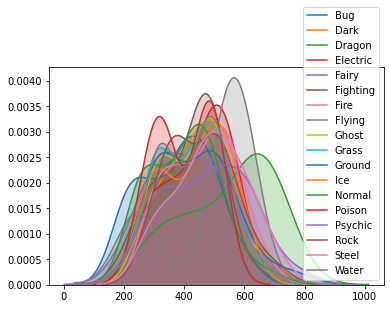

In [49]:
#Dibujo gráficamente la solución de mi test 
import seaborn as sns
for name,serie in pokemon_pivot.iteritems():
    sns.kdeplot(serie,shade=True)


In [100]:
from scipy.stats import f_oneway
def colColumns(lista):
    esto =[]
    for e in lista:
       
        esto.append(lista[e])
    return esto
veamos = colColumns(limpio)    


result = f_oneway(*veamos)
print(result)
## Check the test result
threshold = 0.05
if result.pvalue < threshold:
    print(f"null-hypothesis is rejected Pval={result.pvalue}")
else:
    print(f"we cannot reject the null hypotesis. Pval={result.pvalue}")

F_onewayResult(statistic=28.674566584818066, pvalue=2.254687684597403e-82)
null-hypothesis is rejected pval=2.254687684597403e-82


Write your conclusion below.

In [10]:
# Your conclusions here:
#La conclusion es que negamos la hipótesis nula de que los pokemons de Water su media sea distinta


# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [104]:
# Your code here: """Hipótesis : Defensa y ataque scores son iguales"""
columns= ["Attack","Defense"]
pokemon2challenge = pokemon[columns]
es = stats.ttest_rel(pokemon2challenge.Attack,pokemon2challenge.Defense)
threshold = 0.05
if result.pvalue < threshold:
    print(f"null-hypothesis is rejected Pval={result.pvalue}")
else:
    print(f"we cannot reject the null hypotesis. Pval={result.pvalue}")

null-hypothesis is rejected Pval=2.254687684597403e-82


Describe the results of the test in the cell below.

In [12]:
# Your conclusions here:
#El resulta describe que los dos valores no son iguales por lo que es cierto que sus valores son 


We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [13]:
# Your code here:



Describe the results of the test in the cell below.

In [14]:
# Your conclusions here:



As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [16]:
# Your code here:
    
    

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [17]:
# Your code here:



Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [18]:
# Your code here:



Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:

